### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

'label for each of the above image:'

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

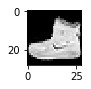

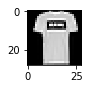

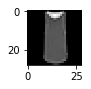

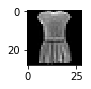

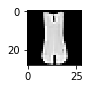

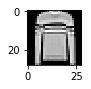

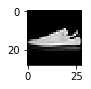

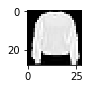

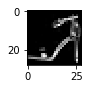

In [8]:
display('label for each of the above image:',trainY[[0,1,2,3,4,5,6,7,8,9]])
import matplotlib.pyplot as plt
for i in range(0,9):
  plt.figure(figsize = (1,1))
  plt.imshow(trainX[i],cmap='gray')
  plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))


In [10]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0929 13:10:22.694688 139805810210688 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainX,trainY,validation_data=(testX,testY))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 2s 38us/sample - loss: 2102.6829 - acc: 0.7388 - val_loss: 3697.3106 - val_acc: 0.6306


### Execute the model using model.fit()

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:

#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization())


In [0]:
#Add OUTPUT layer
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [18]:
model_1.fit(trainX,trainY, validation_data=(testX,testY))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5912 - acc: 0.7983 - val_loss: 0.5102 - val_acc: 0.8232


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

#Compile the model - add Loss and Gradient Descent optimizer
model_1.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model_1.fit(trainX,trainY, validation_data=(testX,testY))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4899 - acc: 0.8319 - val_loss: 0.4984 - val_acc: 0.8290


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model_2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model_2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:

#Compile the model - add Loss and Gradient Descent optimizer
model_2.compile(optimizer=SGD(lr=0.03), loss='categorical_crossentropy',metrics=['accuracy'])

## Review model

In [30]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [31]:
model_2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 80us/sample - loss: 1.8264 - acc: 0.4444 - val_loss: 1.2271 - val_acc: 0.6318
Epoch 2/100
60000/60000 [==============================] - 5s 82us/sample - loss: 1.0035 - acc: 0.6556 - val_loss: 0.8427 - val_acc: 0.6903
Epoch 3/100
60000/60000 [==============================] - 5s 85us/sample - loss: 0.7878 - acc: 0.7057 - val_loss: 0.7091 - val_acc: 0.7364
Epoch 4/100
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6819 - acc: 0.7516 - val_loss: 0.6310 - val_acc: 0.7726
Epoch 5/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.6106 - acc: 0.7848 - val_loss: 0.5763 - val_acc: 0.7991
Epoch 6/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5577 - acc: 0.8099 - val_loss: 0.5370 - val_acc: 0.8152
Epoch 7/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5151 - acc: 0.8244 - val_l

In [32]:
pred = model_2.predict(testX[15:20])
pred

array([[1.14093655e-05, 9.99270499e-01, 8.91655218e-05, 1.76569272e-04,
        2.90165597e-04, 2.17296616e-08, 8.29107876e-07, 1.01641897e-04,
        1.86881266e-09, 5.96634709e-05],
       [1.03588618e-05, 4.17754200e-06, 9.98731911e-01, 1.38595979e-07,
        4.09699132e-04, 3.14988178e-08, 8.06889730e-04, 5.41349846e-06,
        2.08977144e-05, 1.04849369e-05],
       [6.83814069e-05, 1.12578082e-05, 8.16360414e-01, 5.48290627e-05,
        1.09969541e-01, 2.86635839e-07, 7.02599287e-02, 5.80894739e-05,
        3.20425699e-03, 1.29337313e-05],
       [5.70620214e-05, 3.29728272e-10, 1.05775471e-04, 9.47428907e-06,
        3.12023644e-06, 9.92130808e-05, 5.13696345e-04, 2.83589679e-06,
        9.99164939e-01, 4.39431969e-05],
       [9.91802037e-01, 4.07526786e-05, 1.12470050e-04, 6.83489852e-05,
        2.08526285e-06, 3.02078183e-06, 7.95664452e-03, 4.59493021e-09,
        5.46478805e-06, 9.19789181e-06]], dtype=float32)

In [0]:
# better the learning rate better the accuracy as seen
# model needs to better evaluated for better slopes using loops

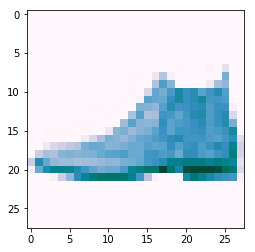

In [33]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='PuBuGn')